In [1]:
import numpy as np
import pandas as pd 


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
car_df=pd.read_csv('car-mpg (1).csv')
car_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
# drop the car name column as it is useless for the model
car_df = car_df.drop('car_name', axis=1)

In [5]:
car_df['hp'].replace({'?':np.nan},inplace=True)

In [6]:
car_df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
car_df['hp'][330]

nan

In [8]:
car_df['hp']=car_df['hp'].astype(float)
car_df['hp']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [10]:
car_df['hp']=car_df['hp'].fillna(car_df['hp'].median()).astype(int)
car_df['hp']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: int32

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int32  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 26.6 KB


In [12]:
car_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [13]:
car_df['origin'] = car_df['origin'].replace({1:'america',2:'europe', 3: 'asia'})
car_df['origin']

0      america
1      america
2      america
3      america
4      america
        ...   
393    america
394     europe
395    america
396    america
397    america
Name: origin, Length: 398, dtype: object

In [14]:
car_df['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [15]:
car_df = pd.get_dummies(car_df, columns=['origin'])

In [16]:
car_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [17]:
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    int32  
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
 10  origin_europe   398 non-null    uint8  
dtypes: float64(3), int32(1), int64(4), uint8(3)
memory usage: 24.6 KB


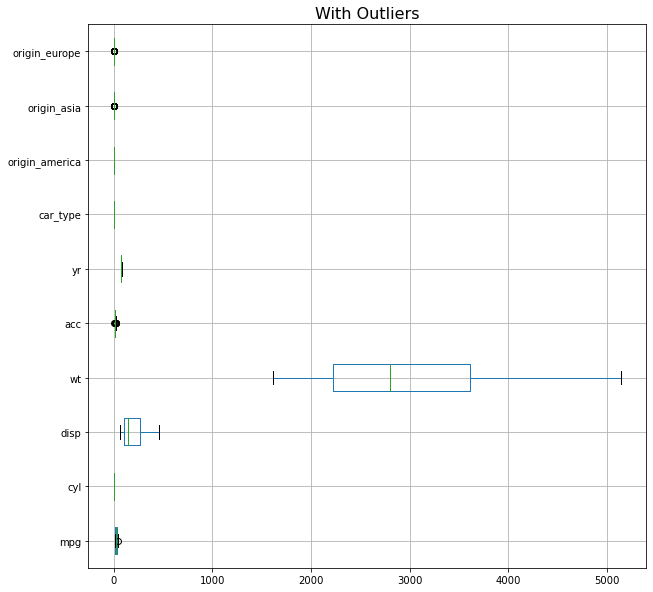

In [18]:
cont=car_df.dtypes[(car_df.dtypes!='int') & (car_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
car_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in car_df[cont].columns:
    lr,ur=remove_outlier(car_df[column])
    car_df[column]=np.where(car_df[column]>ur,ur,car_df[column])
    car_df[column]=np.where(car_df[column]<lr,lr,car_df[column])

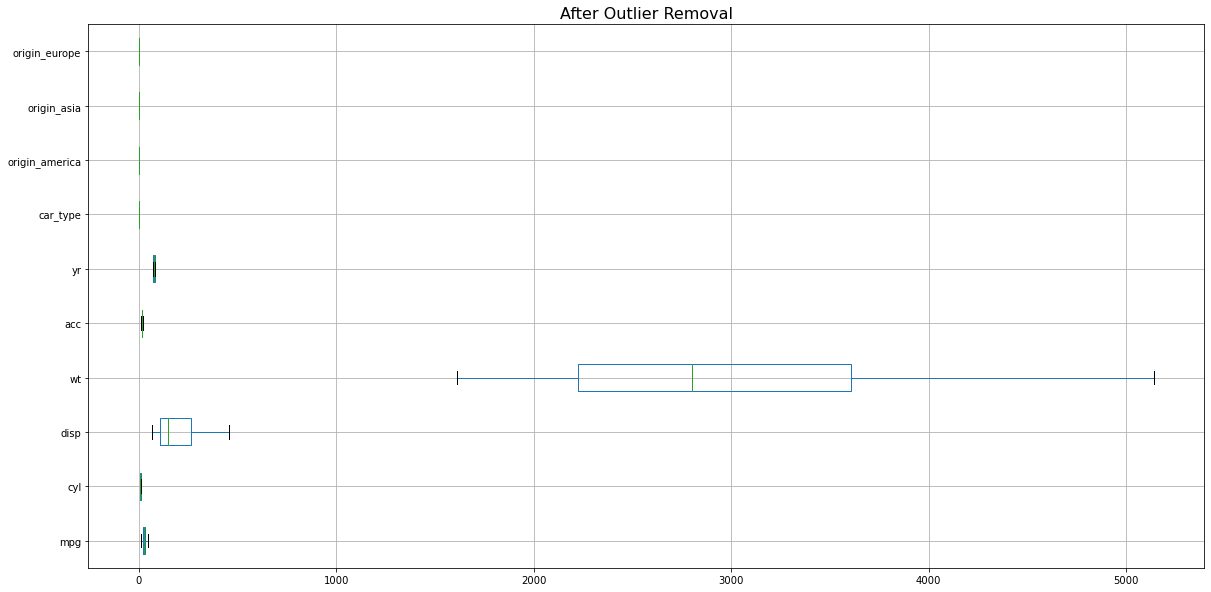

In [21]:
plt.figure(figsize=(20,10))
car_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [22]:
car_df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [23]:
car_df = car_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [24]:
car_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.0,398.0
mean,23.513693,5.454774,193.425879,104.296482,2970.424623,15.552010,76.010050,0.530151,0.625628,0.0,0.0
std,7.813400,1.701004,104.269838,38.224809,846.841774,2.693089,3.697627,0.499718,0.484569,0.0,0.0
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.800000,70.000000,0.000000,0.000000,0.0,0.0
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.0,0.0
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.0,0.0
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.0,0.0
max,46.250000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000,1.000000,1.000000,0.0,0.0


In [25]:
car_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775556,-0.804353,-0.773662,-0.831901,0.418333,0.579337,0.759352,-0.568234,NaN,NaN
cyl,-0.775556,1.000000,0.950721,0.841367,0.896017,-0.509344,-0.348746,-0.912577,0.604351,NaN,NaN
disp,-0.804353,0.950721,1.000000,0.895849,0.932824,-0.548667,-0.370164,-0.855141,0.651407,NaN,NaN
hp,-0.773662,0.841367,0.895849,1.000000,0.862502,-0.691760,-0.413816,-0.701479,0.485374,NaN,NaN
wt,-0.831901,0.896017,0.932824,0.862502,1.000000,-0.422492,-0.306564,-0.815445,0.598398,NaN,NaN
acc,0.418333,-0.509344,-0.548667,-0.691760,-0.422492,1.000000,0.287122,0.386178,-0.246391,NaN,NaN
yr,0.579337,-0.348746,-0.370164,-0.413816,-0.306564,0.287122,1.000000,0.305194,-0.139883,NaN,NaN
car_type,0.759352,-0.912577,-0.855141,-0.701479,-0.815445,0.386178,0.305194,1.000000,-0.624215,NaN,NaN
origin_america,-0.568234,0.604351,0.651407,0.485374,0.598398,-0.246391,-0.139883,-0.624215,1.000000,NaN,NaN
origin_asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

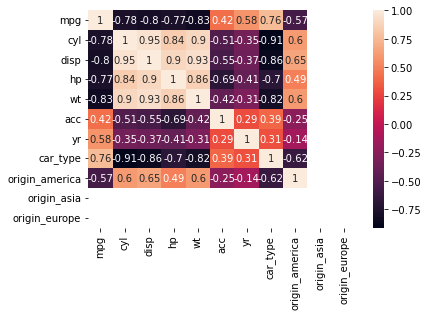

In [26]:
sns.heatmap(car_df.corr(),annot=True)

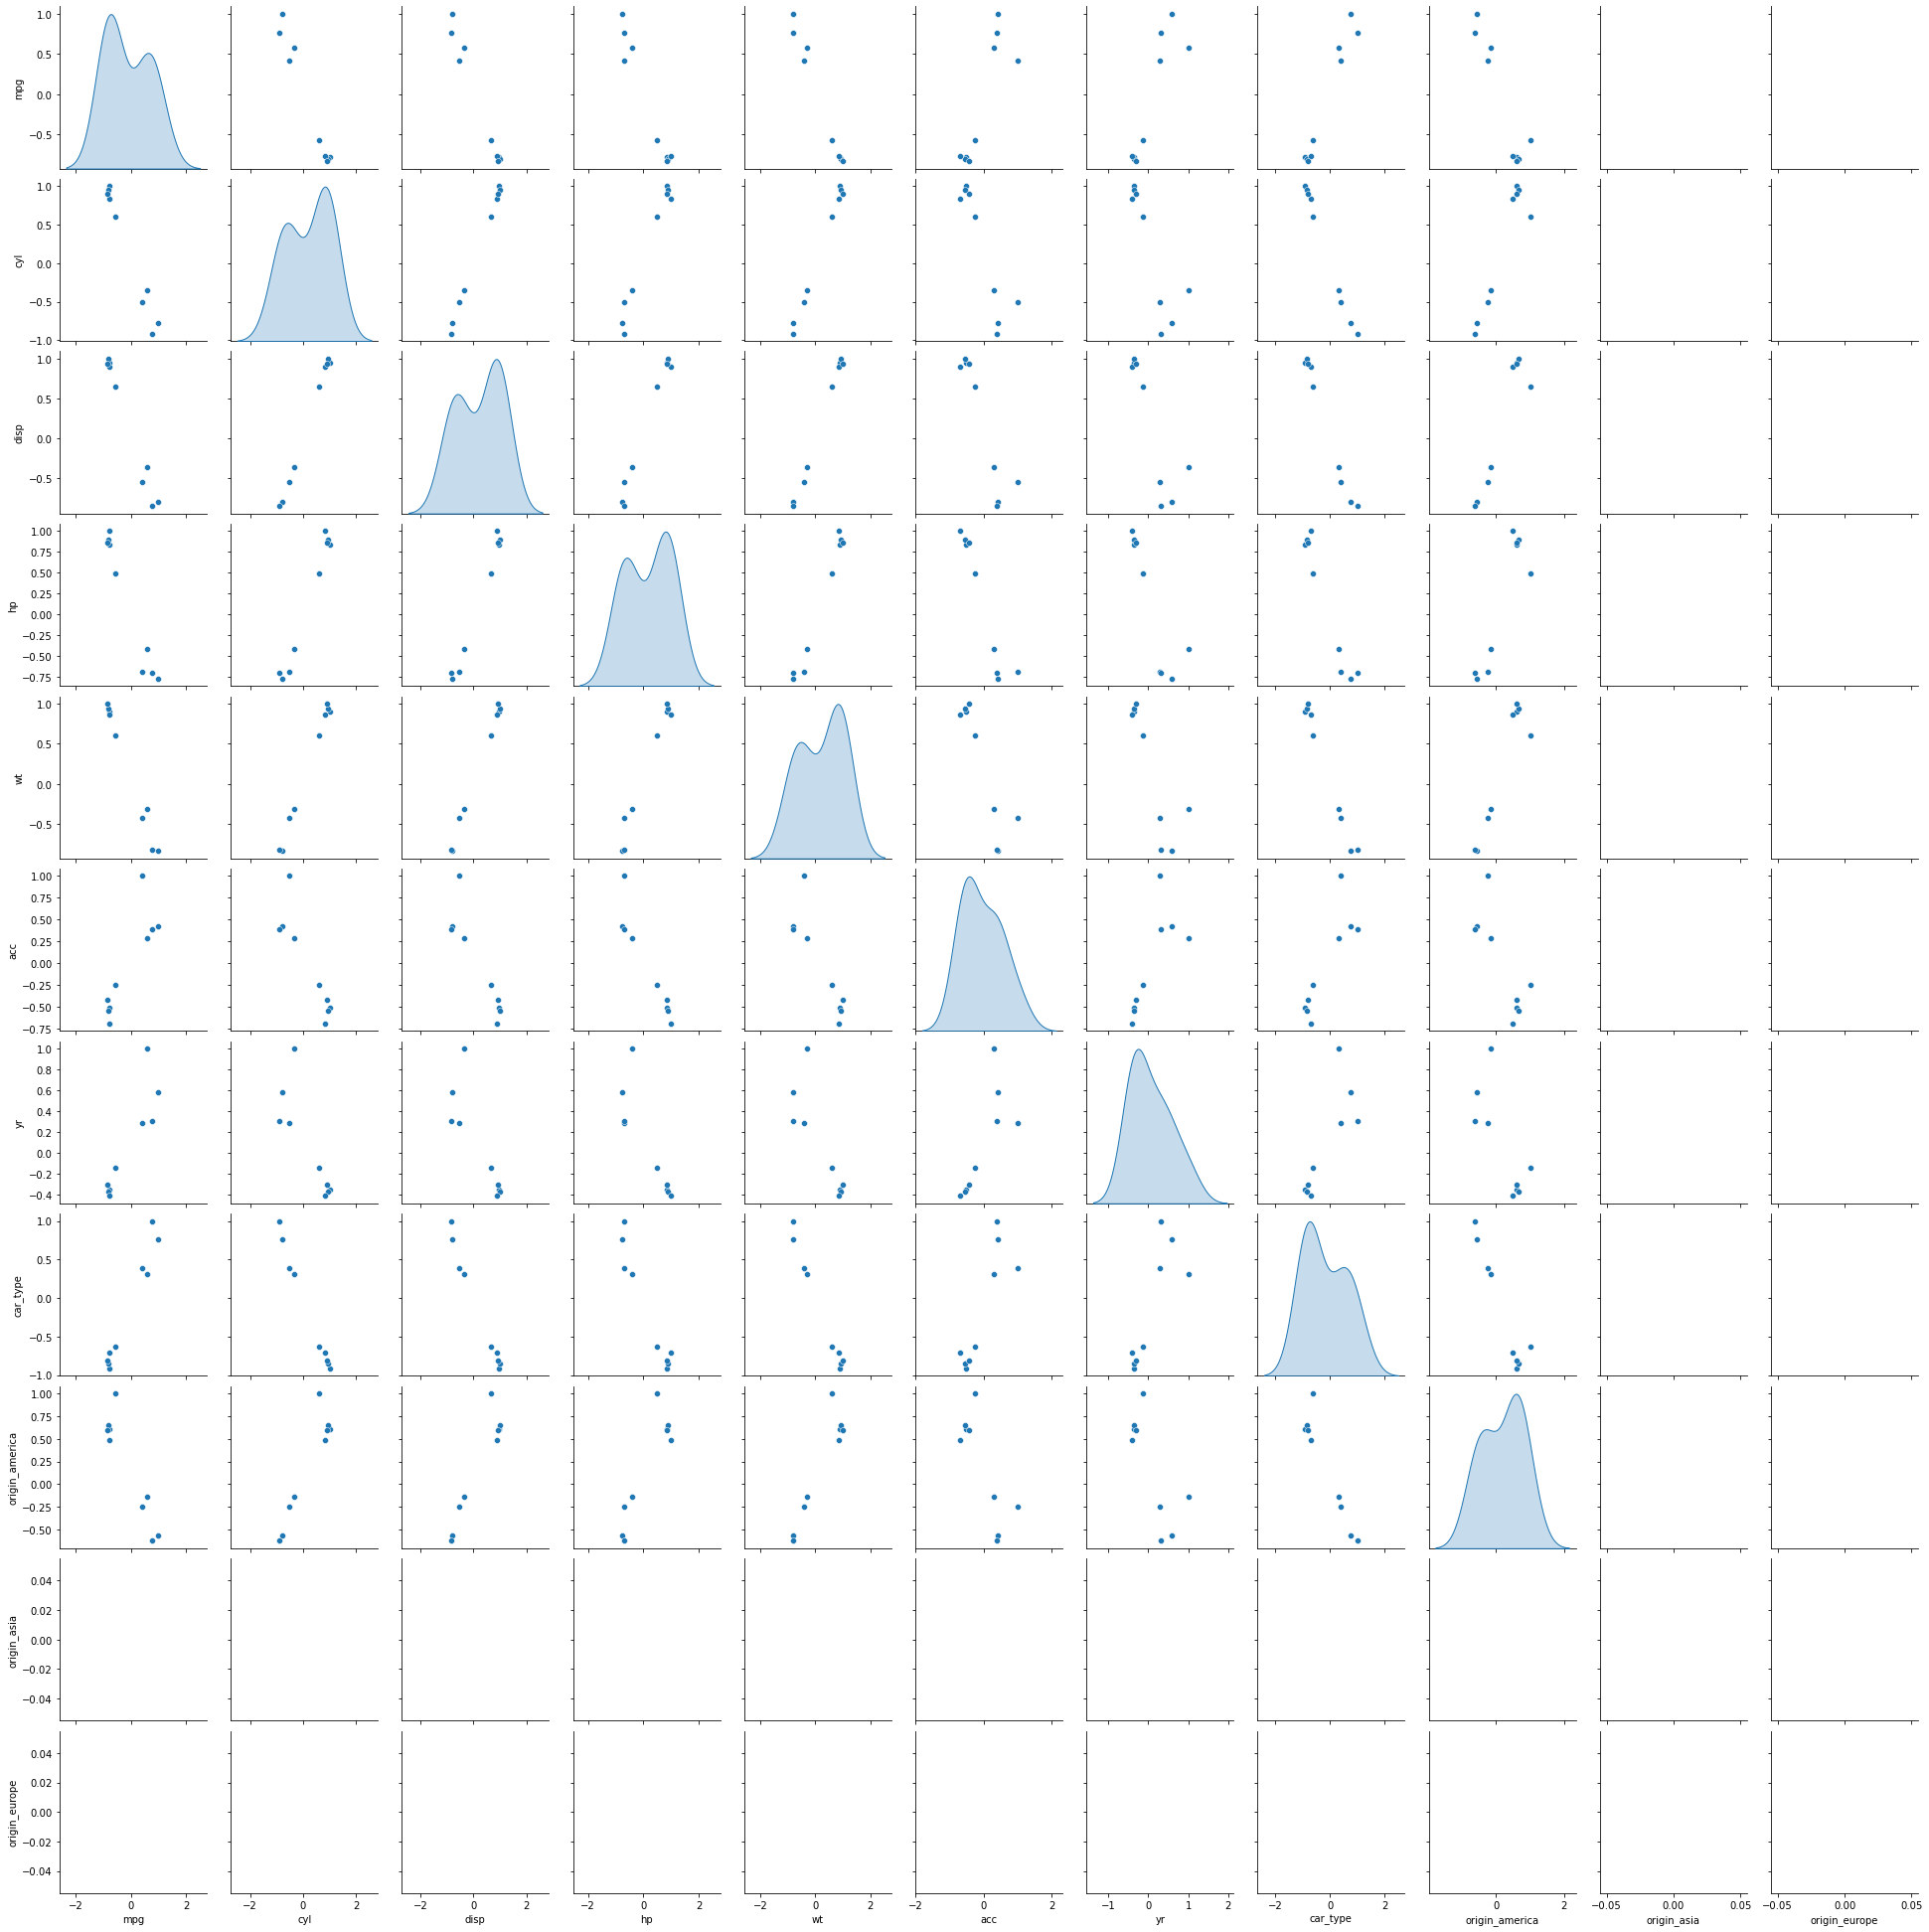

In [27]:
sns.pairplot(car_df.corr(), diag_kind='kde')

D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


<AxesSubplot:>

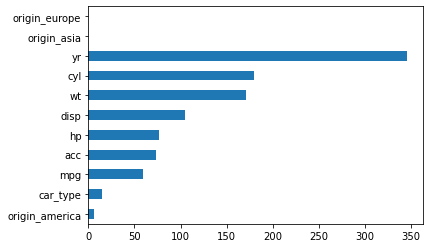

In [28]:
vif_list=[]

for i in range(car_df.shape[1]):
    vif=variance_inflation_factor(car_df.to_numpy(),i)
    vif_list.append(vif)
    
    
s1=pd.Series(vif_list,index=car_df.columns)
s1.sort_values().plot(kind='barh')

In [36]:
x=car_df.drop('mpg',axis=1)
y=car_df['mpg']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
3,8.0,304.0,150,3433.0,12.0,70.0,0.0,1.0,0.0,0.0
18,4.0,97.0,88,2130.0,14.5,70.0,1.0,0.0,0.0,0.0
376,4.0,91.0,68,2025.0,18.2,82.0,1.0,0.0,0.0,0.0
248,4.0,91.0,60,1800.0,16.4,78.0,1.0,0.0,0.0,0.0
177,4.0,115.0,95,2694.0,15.0,75.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
71,3.0,70.0,97,2330.0,13.5,72.0,1.0,0.0,0.0,0.0
106,8.0,350.0,180,4499.0,12.5,73.0,0.0,1.0,0.0,0.0
270,4.0,134.0,95,2515.0,14.8,78.0,1.0,0.0,0.0,0.0
348,4.0,89.0,62,2050.0,17.3,81.0,1.0,0.0,0.0,0.0


In [37]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [38]:
regression_model.coef_

array([ 1.37775998,  0.01792578, -0.03682143, -0.00635308,  0.06827861,
        0.78836791,  5.41440551, -2.24778639,  0.        ,  0.        ])

In [39]:
regression_model.intercept_

-27.21256304554018

In [40]:
mc=zip(list(car_df.columns),list(regression_model.coef_))
list(mc)

[('mpg', 1.3777599813015269),
 ('cyl', 0.017925781055222044),
 ('disp', -0.03682142521145349),
 ('hp', -0.006353080068133085),
 ('wt', 0.06827861325474446),
 ('acc', 0.7883679107555933),
 ('yr', 5.414405512177147),
 ('car_type', -2.247786386245425),
 ('origin_america', 0.0),
 ('origin_asia', 0.0)]

# Evaluation Parameters

In [41]:
#Testing Data

y_pred=regression_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',mse)
print('*'*50)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)
print('*'*50)

mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error :',mae)
print('*'*50)

r2=r2_score(y_test,y_pred)
print('R-Squared value :',r2)


Mean Squared Error : 7.340017333824077
**************************************************
Root Mean Squared Error : 2.7092466358425322
**************************************************
Mean Absolute Error : 2.1294015906753954
**************************************************
R-Squared value : 0.8634833025603618


In [42]:
#Training Data Evaluation


y_pred_train=regression_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)
print('*'*50)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)
print('*'*50)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)
print('*'*50)

r2_train=r2_score(y_train,y_pred_train)
print('R-Squared value :',r2)

Mean Squared Error : 10.29784976288836
**************************************************
Root Mean Squared Error : 3.2090262951381936
**************************************************
Mean Absolute Error : 2.4335759649838757
**************************************************
R-Squared value : 0.8634833025603618


# Normality of residuals

In [43]:
Residual= y_train - y_pred_train
Residual

3      0.317073
18     2.144869
376    1.135876
248    1.788235
177   -2.312887
         ...   
71    -3.899823
106    0.970270
270   -8.042126
348    2.659445
102   -4.354100
Name: mpg, Length: 318, dtype: float64

# 1. KDE plot

<AxesSubplot:xlabel='mpg', ylabel='Density'>

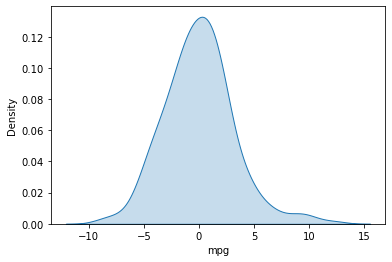

In [44]:
sns.kdeplot(Residual,fill=True)

In [45]:
import statsmodels.api as sm

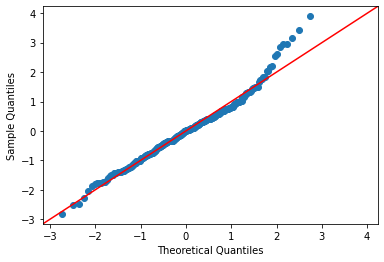

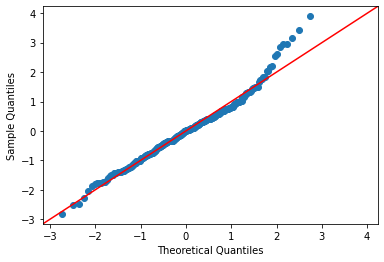

In [46]:
sm.qqplot(Residual,line='45',fit=True)

<AxesSubplot:xlabel='mpg', ylabel='mpg'>

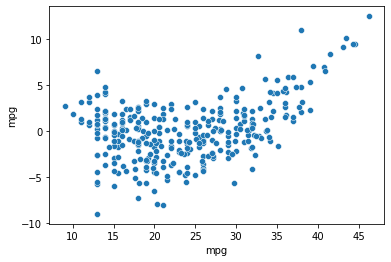

In [47]:
sns.scatterplot(x=y_train,y=Residual)

In [48]:
result_dict = {'R Squared value_Train':[],'R Squared value_Test':[]}
index = []


In [50]:
result_dict['R Squared value_Train'].append(r2_train)
result_dict['R Squared value_Test'].append(r2)
index.append("Linear Regression model")

In [51]:
x_test.head(1)

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
198,4.0,91.0,53,1795.0,17.4,76.0,1.0,0.0,0.0,0.0


# Testing on Input

In [52]:
import pickle

with open('linear_model.pkl','wb') as f:
    pickle.dump(regression_model,f)

In [53]:
x_test.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [54]:
cyl= 4
disp= 350
hp= 90
wt= 3500
acc= 11
yr= 75
car_type= 0
origin= 'europe'

In [55]:
test_array=np.zeros(len(x.columns),dtype=int)
test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:

test_array[0]= cyl
test_array[1]= disp
test_array[2]= hp
test_array[3]= wt
test_array[4]= acc
test_array[5]= yr
test_array[6]= car_type

origin='origin_'+'europe'
test_array

array([   4,  350,   90, 3500,   11,   75,    0,    0,    0,    0])

In [57]:
column_names=x.columns
column_names

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [58]:
origin_index=np.where(column_names==origin)[0][0]
test_array[origin_index]=1

In [59]:
print(np.around(regression_model.predict([test_array])[0],2))

18.9


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
regression_model.predict([test_array])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.90144979])

In [61]:
with open('linear_model.pkl','wb') as f:
    pickle.dump(regression_model,f)

# KNN 

In [62]:
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [63]:
car_df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

# Feature Engineering

In [64]:
x=car_df.drop('mpg',axis=1)
y=car_df['mpg']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
x_train

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
3,8.0,304.0,150,3433.0,12.0,70.0,0.0,1.0,0.0,0.0
18,4.0,97.0,88,2130.0,14.5,70.0,1.0,0.0,0.0,0.0
376,4.0,91.0,68,2025.0,18.2,82.0,1.0,0.0,0.0,0.0
248,4.0,91.0,60,1800.0,16.4,78.0,1.0,0.0,0.0,0.0
177,4.0,115.0,95,2694.0,15.0,75.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
71,3.0,70.0,97,2330.0,13.5,72.0,1.0,0.0,0.0,0.0
106,8.0,350.0,180,4499.0,12.5,73.0,0.0,1.0,0.0,0.0
270,4.0,134.0,95,2515.0,14.8,78.0,1.0,0.0,0.0,0.0
348,4.0,89.0,62,2050.0,17.3,81.0,1.0,0.0,0.0,0.0


In [65]:
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [66]:
#Testing Data

y_pred=knn_model.predict(x_test)

mse_test=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',mse)
print('*'*50)

rmse_test=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)
print('*'*50)

mae_test=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error :',mae)
print('*'*50)

r2_test=r2_score(y_test,y_pred)
print('R-Squared value :',r2)

Mean Squared Error : 10.29784976288836
**************************************************
Root Mean Squared Error : 3.2090262951381936
**************************************************
Mean Absolute Error : 2.4335759649838757
**************************************************
R-Squared value : 0.8634833025603618


In [109]:
#Training Data Evaluation


y_pred_train=knn_model.predict(x_train)

mse_train=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)
print('*'*50)

rmse_train=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)
print('*'*50)

mae_train=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)
print('*'*50)

r2_train=r2_score(y_train,y_pred_train)
print('R-Squared value :',r2)

Mean Squared Error : 10.297849762888362
**************************************************
Root Mean Squared Error : 3.2090262951381936
**************************************************
Mean Absolute Error : 2.4335759649838775
**************************************************
R-Squared value : 0.8634833025603617


In [67]:
result_dict['R Squared value_Train'].append(r2_train)
result_dict['R Squared value_Test'].append(r2)
index.append("KNN Regressor model")


In [68]:
print(np.around(knn_model.predict([test_array])[0],2))

17.94


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [69]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(knn_model,f)